# *Лабораторная работа* №5
## Выполнила Разова Анна 430 группа
### Вариант №6

Цель: 
1. Вычислить интеграл по квадратурной формуле Симпсона с относительной точностью 0.01;
2. Построить график подынтегральной функции и график зависимости значения интеграла от номера интерации;
3. Построить график зависимости свободных членов системы от числа уравнений;
4. Решить систему уравнений методом минимальной невязки с относительной точностью 0.001;
5. Определить число обусловленности линейной системы;
6. Построить график решения $\bar{x}=${$x_1,x_2,...,x_n$} от i;
7. Построить график зависимости невязки от i;
8. Построить график зависимости нормы решения от номера интерации.




*Данная система:*
$$
\begin{cases}
x_1=1\\
x_{i-1}-(4+\frac{sin2i}{10+i})x_i+x_{i+1}=-1+\int_0^1\frac{cos(2t+1)dt}{1+it^2}\\
x_n=1\\
\end{cases},\qquad i=2,3,\ldots,n-1
$$

*Импортиртируем необходимые библиотеки:*

In [2]:
import numpy as np
from numpy import abs,sqrt,cos,sin
import matplotlib.pyplot as plt  
import scipy.integrate as spint

Далее введём подынтегральную функцию:

In [3]:
def f(t,i):
    return np.cos(2*t+1)/(1+i*t**2)

## Метод Симпсона
В данной работе интеграл считался по квадратурной формуле Симпсона с относительной точностью 0.001.

Задача вычисления интеграла Римана состоит в замене вычисления интеграла 
$$I=\int_\alpha^\beta f(x)dx \qquad (1)$$ 
алгоритмом из конечного числа операций. Интеграл (1) можно рассматривать как оператор 
$$A[f]=\int_\alpha^\beta f(x)dx \qquad (2)$$ 
имеющий областью определения пространство $H_{[\alpha,\beta]}$, а областью значений просьранство $R_1$.

Оператор А аппроксимируют последовательностью конечномерных операторов $A_n$, имеющих областью определения пространство $R_n$, а областью значений пространство $R_1$.
ООператор А задаётся формулой:
$$A_n[f_n]=\sum_{i=1}^n C_i^{(n)} f(x_i^{(n)}) \qquad (3)$$
Данная формула называется квадратурной формулой, определяемой весовыми коэффициентами $C_i^{(n)}$ и узлами $x_i^{(n)}$ сетки $w_n$. Элемент $f_n$ пространства $R_n$ называют сеточной функцией, заданной на  сетке $w_n$.

Пусть задано пространство $H_{[\alpha,\beta]}$ и натуральное число n. Требуется среди всех квадратурных формул вида $\sum_{i=1}^n C_i^{(n)} f_i$ определить такую, чтобы величина верхней грани
$$sup_{f\in H_{[\alpha,\beta]} }|\int_\alpha^\beta f(x)dx - \sum_{i=1}^n C_i^{(n)} f_i|, \qquad (4)$$
являлась наименьшей. 

Речь идёт о таком выборе на отрезке $[\alpha,\beta]$ узлов сетки $x_i\in w_n$ и весовых коэффициентов $C_i^{(n)}$, при котором приближённое значение интеграла, даваемое квадратурной формулой, было наилучшим.
Предположим, что интегрируемая функция принадлежит классу $C_{[\alpha,\beta]}$ и задана сетка $w_n$ отрезка $[\alpha,\beta]$. 

Рассмотрим задачу восстановления элемента $f\in H_{[\alpha,\beta]} $ по заданной сеточной функции $ f_n\in R_n $. Известно, что задача решается просто при помощи интерполяционных многочленов. Так в случае $ H_{[\alpha,\beta]} =C_{[\alpha,\beta]}^{n+1}$, выбирая в качестве интерполяционного многочлена многочлен Лангранжа, будем иметь 
$$ f(x)=\sum_{k=0}^n f(x_k^{(n)}) \prod_{i=0,i\neq k}^n \frac{x-x_i^{(n)}}{x_k^{(n)}-x_i^{(n)}}  + \frac{f^{n+1}(\psi)}{(n+1)!} \prod_{i=0}^n (x-x_i^{(n)}).\qquad (5)$$

Подставляя (5) в (1), будем иметь
$$\int_\alpha^\beta f(x)dx = \sum_{k=0}^n f(x_k^{(n)})\int_\alpha^\beta \prod_{i=0,i\neq k}^n \frac{x-x_i^{(n)}}{x_k^{(n)}-x_i^{(n)}} dx + \frac{f^{n+1}(\psi)}{(n+1)!} \int_\alpha^\beta \prod_{i=0}^n (x-x_i^{(n)})dx\qquad (6)$$
или
$$\int_\alpha^\beta f(x)dx = \sum_{k=0}^n C_k^{(n)} f(x_k^{(n)}) + R_n[f], \qquad (7)$$
где
$$C_k^{(n)}=\int_\alpha^\beta \prod_{i=0,i\neq k}^n \frac{x-x_i^{(n)}}{x_k^{(n)}-x_i^{(n)}} dx,\qquad (8)$$
$$R_n[f]=\frac{f^{n+1}(\psi)}{(n+1)!} \int_\alpha^\beta \prod_{i=0}^n (x-x_i^{(n)})dx.\qquad (9)$$
Первое слагаемое в правой части (7) называется квадратурной формулой Ньютона-Котеса, второе - остаточным членом.

При n=2 формула Ньютона-Котеса называется квадратурной формулой Симпсона. Она выглядит следующим образом:
$$\sum_{k=0}^2 C_k^{(2)} f(x_k^{(2)})=\frac {\beta-\alpha}{6} (f(\alpha) +4f(\frac{\beta+\alpha}{2})+f(\beta)).\qquad (10)$$

In [4]:
def integral(f,alpha,beta,e):
    S=10**9
    S0=0
    N=1
    ii=0
    r=[]
    q=[]
    while abs(S-S0)>e:
        N=N*2
        ii=ii+1
        h=(beta-alpha)/N
     #   x=np.linespace(alpha,beta,N+1)
        t=np.arange(alpha,beta,h)
        S0=S
       # S=np.sum([(t[j+1]-t[j])/6*(f(t[j],i)+4*f(((t[j+1]+t[j])*0.5),i)+f(t[j+1],i))] for j in range(1,len(t)))
        S=0
        for j in range(0,len(t)-1):
            a=0.5*t[j+1]+0.5*t[j]
            dS=(t[j+1]-t[j])/6*(f(t[j],i)+4*f(a,i)+f(t[j+1],i))
            S+=dS
        r.append(S)
        q.append(ii)
    return S,ii,r,q


alpha=0
beta=1
e=0.01
i=100



Далее стоим необходимые графики.

График подынтегральной функции при i=35.

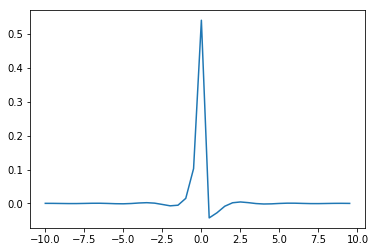

In [5]:
i=35
t=np.arange(-10,10,0.5)
F=f(t,i)
plt.plot(t,F)
plt.show()

График значения интеграла от номера интерации при i=35.

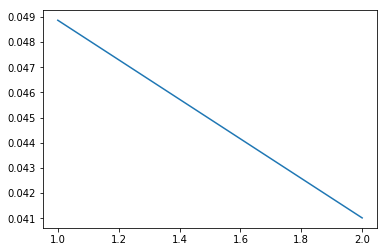

In [6]:
i=35
Q=integral(f,alpha,beta,e)[3]
R=integral(f,alpha,beta,e)[2]
plt.plot(Q,R)
plt.show()
#print(Q,R)

График зависимости свободных членов от i.

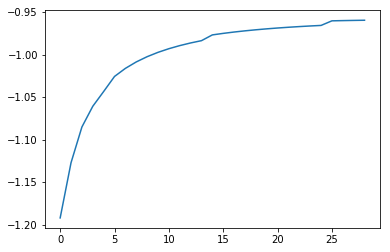

In [7]:
n=30
SS=[]
for i in range(1,n):
#    F=f(t,i)
    p=integral(f,alpha,beta,e)[0]
    pp=p-1
    SS.append(pp)

plt.plot(SS)
plt.show()

## Метод минимальной невязки.

Пусть необходимо решить систему алгебраических уравнений
$$ 
a_{11}x_1+...+a_{1n}x_n=b_1\\
...........................\\
a_{n1}x_1+...+a_{nn}x_n=b_n\\
\qquad (1)$$
или в матричной форме 
$$ Ax=b, \qquad (2)$$
где А={$a_{ij}$} невырожденная ($n\times n$)-матрица, x={$x_i$} - n-вектор (столбец) неизвестных, b={$b_i$}-заданный n-вектор.

В данной работе система решается интерационным методом, а именно: методом минимальной невязки.

Интерационными называют приближённые методы, в которых решение системы (1) получаются как предел последовательности векторов $\{x^k\}_{k=1}^{\infty}$, каждый последующий элемент которой вычисляется по некоторому единому правилу. Начальный элемент $x^1$ выбирается произвольно. Интерация $x^k$ является с точностью $\epsilon$ приближённым решением системы (1),если
$$||x^k-x^0||\leq \epsilon, \qquad (3)$$
где $x^0$ - точное решение системы (1).

Для интерационного метода решения системы (1) существует такая последовательность невырожденных матриц $H_k$, к=1,2,..., что правило построения элементов итерационной последовательности записывается в виде
$$x^{k+1}=x^k-H_k(Ax^k-b). \qquad (4)$$
Запишем (4) в виде
$$x^{k+1}=T_kx^k+H_kb, \qquad (5)$$
 где $T_k=E-H_kE$, Е-единичная (n$\times$ n)-матрица. Вектор $ \phi^k=x^k-x^0$ называется вектором ошибки, а вектор $r^k=Ax^k-b$- вектором невязки.

В методе минимальной невязки 
$$H_k=\tau_kE, \qquad (6)$$
$$T_k=E-\tau_kA. \qquad (7)$$
Невязка на (k+1)-ом шаге равна $r^k=Ax^k -f$.

Параметр $\tau _k$ выбирается из условия минимума нормы невязки на (k+1)-ом шаге и имеет вид
$$\tau_k=\frac{(Ar^k,r^k)}{(Ar^k,Ar^k)}. \qquad (8)$$
Процесс (5) имеет вид 
$$x^{k+1}=(E-\tau_kA)x^k+\tau_kEb. \qquad (9)$$

In [8]:
def коэффициент(i):
    if (i==1)|(i==n):
        return 1
    else:
        return -(4+sin(2*i)/(10+i))

def b(i):
#    inteps=0.01
    # подинтегральная функция для конкретного i
    def F(t):
        return f(i,t)
    return -1+integral(f,alpha,beta,e)[0]


# Заполняем матрицы уравнения Ax=b
def lin(n):
    A=np.zeros([n,n])
    for j in range(0,n):
        A[j][j]=коэффициент(j+1)
    for j in range(1,n-1):
        A[j][j-1]=A[j][j+1]=1

    B=np.ones(n)
    for j in range(1,n-1):
        B[j]=b(j+1)

# Начальное приближение
    x=B
    ee=0.001
    xold=B+10*ee
    E=np.identity(n)

# Итерационный процесс
    N=0
    H=[]
    NN=[]
    while np.linalg.norm(x-xold)/np.linalg.norm(xold)>ee:
        N=N+1
        r=A@x-B
        tau=((A@r)@r)/((A@r)@(A@r))
        xold=x
        x=(E-tau*A)@x+(tau*E)@B
        h=np.linalg.norm(x)
        H.append(h)
        NN.append(N)
    return x,H,NN,A,B,N,r

n=100
result=lin(n)
#print(np.linalg.norm(lin(n)[6]))
#Сравнение нормы нашего решения и решения встроенной функцией.
# print(result[0][-1])
# print('Наше решение:',np.linalg.norm(result[0]),'(','Количество интераций:',result)[5],"'")
# print('Решение встроенной функцией:',np.linalg.norm(np.linalg.solve(result[3],result[4])))

Находим обусловленность системы.

In [1]:
# print(np.linalg.cond(result[3]))

Далее строим необходимые графики.

График решения $\bar{x}={(x_1,x_2,...,x_n)}$ от i.

In [ ]:
for w in range(1,1000):
#    kk=np.linalg.solve(lin(w)[3],lin(w)[4])
    k=lin(w)[0]
k=[lin(w)[0] for w in range(1,1000)]
plt.plot(k)    
#plt.plot(kk)
plt.show()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


График зависимости невязки от i.

In [ ]:
for w in range(1,n):
    k=lin(w)[6]
plt.plot(k)    
plt.show()

График зависимости нормы решения от номера интерации.

In [ ]:
plt.plot(lin(1000)[2],lin(1000)[1])
plt.show()

Данная программа работает и при 10000 уравнений.

In [ ]:
print('Наше решение:',np.linalg.norm(lin(10000)[0]),'(','Количество интераций:',lin(10000)[5],')')
print('Решение встроенной функцией:',np.linalg.norm(np.linalg.solve(lin(10000)[3],lin(10000)[4])))